In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import nibabel as nib

from scipy.io import loadmat



In [2]:
img_2d = nib.load("affine_p75_withACSC_multipleTemplates_woCerebellum/2d/slab0001.nii")

#print(img_2d.header)

#   get image data as numpy array
a = img_2d.get_fdata()

print('2D image: ')
plt.imshow(a, cmap='hot')
plt.show()


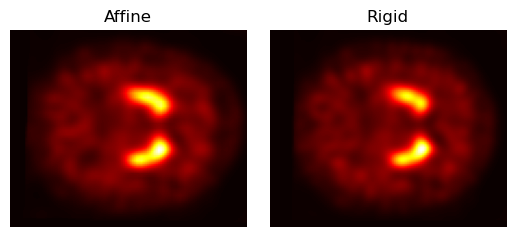

In [3]:
# 3D image (show one slice)

img_3d = nib.load("affine_p75_withACSC_multipleTemplates_woCerebellum/3d/vol0001.nii")

# Reshape image from shape (h,w,img) to (img,h,w)

#print(f'shape before: {img_3d.get_fdata().shape}')
img_3d_reshaped = np.transpose(img_3d.get_fdata(), (2, 0, 1))
#print(f'shape after: {img_3d_reshaped.shape}')

#   Show slice
print('Slice 0 of volume image: ')
plt.imshow(img_3d_reshaped[0], cmap='hot')
plt.show()



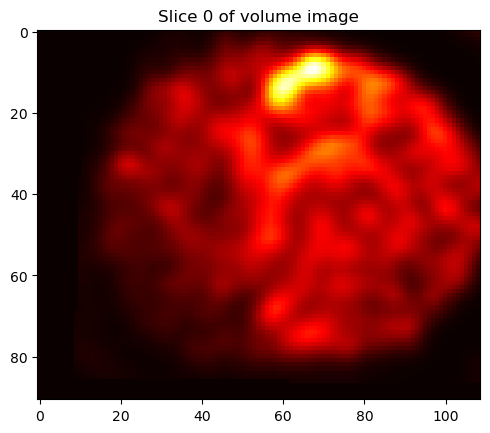

In [4]:


def plot_animation_for_image(img: np.ndarray):

    if img.ndim != 3:
        raise Exception('Function requires volumetric image as input.')

    fig, ax = plt.subplots()

    img_slice = ax.imshow(img[0], cmap='hot')

    def init_func():
        img_slice.set_array(img[0])
        return img_slice,

    def update_func(idx):
        img_slice.set_array(img[idx])
        return img_slice,

    ani = FuncAnimation(fig=fig,
                        func=update_func,
                        frames=len(img),
                        init_func=init_func,
                        blit=True)

    plt.close()

    return ani.to_jshtml()


HTML(plot_animation_for_image(img=img_3d_reshaped))


In [6]:
# Inspect MAT file

# Load the mat file
mat_data = loadmat('mat/mat0216.mat')



In [37]:
#  Labels are in Excel file..



ID  Age Sex  Camera  Jacobian  SBRcauR  SBRputR  SBRcauL  SBRputL   
0        1   79   M       2    1.1795   2.5934   1.9020   2.9580   2.0329  \
1        2   44   M       4    1.3054   2.1989   1.3510   1.9877   1.3229   
2        3   52   M       4    1.2735   2.6972   1.4199   2.5168   1.4709   
3        4   61   F       4    1.7136   2.3240   0.9256   2.1576   0.6787   
4        5   24   M       2    1.4447   3.5146   2.0582   3.6055   1.9948   
...    ...  ...  ..     ...       ...      ...      ...      ...      ...   
1735  1736   23   M       2    1.8270   3.1021   1.8880   2.9920   1.8182   
1736  1737   71   M       2    1.3758   2.8400   1.6465   2.9118   1.6024   
1737  1738   72   F       4    1.5725   2.5261   1.3228   2.3099   1.2875   
1738  1739   67   M       1    1.3380   2.0447   1.0898   1.7474   0.7597   
1739  1740   42   F       2    1.7377   2.7491   0.9091   2.0462   0.5551   

      R1S1  R1S2  R2S1  R2S2  R3S1  R3S2  R1  R2  R3  
0        0     0     0     0     0     0   0   0   0  
1        0     0     0     0     0     0   0   0   0  
2        0     0     0     0     0     0   0   0   0  
3        1     1     1     1     1     1   1   1   1  
4        0     0     0     0     0     0   0   0   0  
...    ...   ...   ...   ...   ...   ...  ..  ..  ..  
1735     0     0     0     0     0     0   0   0   0  
1736     0     0     0     0     0     0   0   0   0  
1737     0     0     1     0     0     0   0   0   0  
1738     0     0     1     1     0     0   0   1   0  
1739     1     1     1     1     1     1   1   1   1  

[1740 rows x 18 columns]

Amount of cases where raters do not agree on label: 83 cases / 4.77%
